### A Possible solution to tuning the number of layers and neurons in MLP at once (using grid search)

In [1]:
import itertools
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# DATASET

In [2]:
url = 'https://query.data.world/s/4f33wmdncz2wkkl2pbfl2oaojmns7w'
df = pd.read_csv(url, header=None)
X, y = df.values[:, :1], df.values[:, 1]
df

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


### combination of layers and neurons

In [ ]:
# start with smaller number of items in the tuple to see what it does
# try reasonable number of neurons based on the length of the the input vector

In [3]:
three_layers = [x for x in itertools.product((50, 25, 12, 5),repeat=3)]
two_layers = [x for x in itertools.product((50, 25, 12, 5),repeat=2)]
one_layer = [x for x in itertools.product((50, 25, 12, 5),repeat=1)]

In [4]:
layers = three_layers + two_layers + one_layer
layers

[(50, 50, 50),
 (50, 50, 25),
 (50, 50, 12),
 (50, 50, 5),
 (50, 25, 50),
 (50, 25, 25),
 (50, 25, 12),
 (50, 25, 5),
 (50, 12, 50),
 (50, 12, 25),
 (50, 12, 12),
 (50, 12, 5),
 (50, 5, 50),
 (50, 5, 25),
 (50, 5, 12),
 (50, 5, 5),
 (25, 50, 50),
 (25, 50, 25),
 (25, 50, 12),
 (25, 50, 5),
 (25, 25, 50),
 (25, 25, 25),
 (25, 25, 12),
 (25, 25, 5),
 (25, 12, 50),
 (25, 12, 25),
 (25, 12, 12),
 (25, 12, 5),
 (25, 5, 50),
 (25, 5, 25),
 (25, 5, 12),
 (25, 5, 5),
 (12, 50, 50),
 (12, 50, 25),
 (12, 50, 12),
 (12, 50, 5),
 (12, 25, 50),
 (12, 25, 25),
 (12, 25, 12),
 (12, 25, 5),
 (12, 12, 50),
 (12, 12, 25),
 (12, 12, 12),
 (12, 12, 5),
 (12, 5, 50),
 (12, 5, 25),
 (12, 5, 12),
 (12, 5, 5),
 (5, 50, 50),
 (5, 50, 25),
 (5, 50, 12),
 (5, 50, 5),
 (5, 25, 50),
 (5, 25, 25),
 (5, 25, 12),
 (5, 25, 5),
 (5, 12, 50),
 (5, 12, 25),
 (5, 12, 12),
 (5, 12, 5),
 (5, 5, 50),
 (5, 5, 25),
 (5, 5, 12),
 (5, 5, 5),
 (50, 50),
 (50, 25),
 (50, 12),
 (50, 5),
 (25, 50),
 (25, 25),
 (25, 12),
 (25, 5),
 (

## Model and Grid search

In [5]:
model = MLPRegressor(max_iter=2000,random_state=0)

params = {'hidden_layer_sizes': layers}

search = GridSearchCV(model, 
                      params, 
                      scoring='neg_root_mean_squared_error', 
                      n_jobs=-1, 
                      cv=5)

results = search.fit(X, y)
print('Best Score: %s' % -results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

Best Score: 35.98334640059188
Best Hyperparameters: {'hidden_layer_sizes': (5, 50)}


C:\Users\kamcl\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### heatmap: number of neurons in the first layer vs second layer

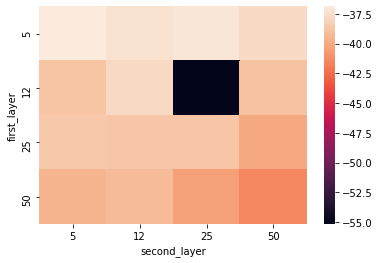

In [6]:
MSE_results_df = pd.DataFrame(search.cv_results_)
MSE_results_df = MSE_results_df[:len(three_layers + two_layers)]
MSE_results_df['first_layer'] = [x[0] for x in MSE_results_df['param_hidden_layer_sizes']]
MSE_results_df['second_layer'] = [x[1] for x in MSE_results_df['param_hidden_layer_sizes']]
MSE_results_df = MSE_results_df[:len(MSE_results_df['second_layer'])]

table = pd.pivot_table(MSE_results_df, 
                       values='mean_test_score', 
                       index='first_layer', 
                       columns='second_layer')
     
plot = sns.heatmap(table)